In [31]:
import pandas as pd
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

In [32]:
plt.rc('font',family='Malgun Gothic')

In [5]:
df = pd.read_csv('../data/preprocessed.csv',index_col=0)

In [9]:
#이거는 이미 코드 전체 합해놓은거에 있는 코드입니다.
calendar_month = {v:k for k,v in enumerate(calendar.month_abbr)}

def month_number(data):
    for keys,values in calendar_month.items():
        data.loc[data['arrival_date_month'].str.contains(keys),'arrival_date_month_num'] = values
    data['arrival_date_month_num'] = data['arrival_date_month_num'].astype('int')
    return data[['arrival_date_month','arrival_date_month_num']]

In [11]:
month_number(df)

,arrival_date_month,arrival_date_month_num
0,July,7
1,July,7
2,July,7
3,July,7
4,July,7
...,...,...
119385,August,8
119386,August,8
119387,August,8
119388,August,8


In [17]:
df[['arrival_date_year','arrival_date_month_num','arrival_date_day_of_month']] = df[['arrival_date_year','arrival_date_month_num','arrival_date_day_of_month']].astype('str')

In [20]:
df['arrival_date'] = df['arrival_date_year'] + "-" + df['arrival_date_month_num'] + "-" + df['arrival_date_day_of_month']

In [23]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

In [27]:
df['arrival_day_of_week'] = df['arrival_date'].dt.dayofweek

Text(0, 0.5, '')

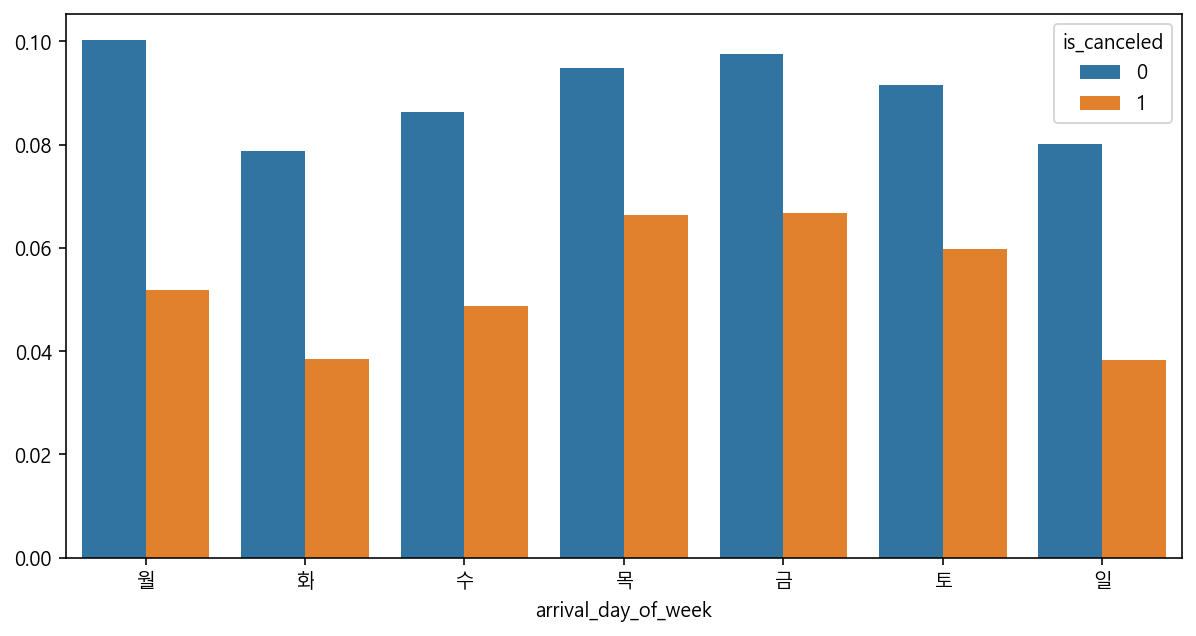

In [49]:
plt.figure(figsize=(10,5))
g = sns.barplot(data=df,x='arrival_day_of_week',y='arrival_day_of_week',estimator=lambda x: len(x) / len(df),hue='is_canceled')
g.set(xticklabels=['월','화','수','목','금','토','일'])
g.set_ylabel('')